# 블로그 리뷰 데이터 수집 프로세스
1. 네이버에서 특정 영화를 검색
2. 검색된 페이지에서 '리뷰'를 클릭
3. '리뷰' 항목에 있는 블로그 url 수집
4. 블로그 url을 이용하여 윂 페이지 요청
5. frame 또는 iframe의 src 속성값 가져오기(찐 블로그 url)
6. 가져온 url로 재요청
7. 찐 블로그 페이지에서 리뷰데이터 수집

In [1]:
import pandas as pd
import requests as req
from bs4 import BeautifulSoup as bs
header_option = {
    'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'
}

In [2]:
movie_search_url = 'https://search.naver.com/search.naver?where=nexearch&sm=tab_etc&mra=bkEw&pkid=68&os=28851862&qvt=0&query=%EC%98%81%ED%99%94%20%ED%99%94%EB%9E%80%20%EB%A6%AC%EB%B7%B0'
res = req.get(movie_search_url,headers=header_option)
html = bs(res.text,'lxml')

In [3]:
blog_urls = []
for i in html.select('dt.list_title>a.review_link') :
    blog_urls.append(i['href'])

In [4]:
blog_res = req.get(blog_urls[0],headers=header_option)
blog_html=bs(blog_res.text,'lxml')

In [5]:
blog_url='https://blog.naver.com'+blog_html.select_one('iframe')['src']

In [6]:
#찐 블로그 리뷰 페이지 요청
t_blog_res = req.get(blog_url,headers=header_option)
t_blog_html = bs(t_blog_res.text,'lxml')

In [16]:
review = t_blog_html.select_one('div.se-main-container').text.replace('\n','').replace('\u200b','').replace('  ','')
review

"영화 화란 스포일러 후기 리뷰 줄거리 결말 평점 송중기 비비 홍사빈화란 감독김창훈출연홍사빈, 송중기, 김형서개봉2023.10.11. <화란>은 배우 송중기의 출연으로 큰 화제를 모았던 작품입니다. 송중기가 극을 이끄는 메인 주연이 아닌 조력자 역할을, 갈라진 귀와 온몸에 상처가 가득한 조직 중간 보스라는 거친 역을 맡으면서 관심을 받았습니다. 여기에 노개런티 출연도 화제가 되었는데요. 이에 대해 송중기는 이 작품의 시나리오가 지닌 눅눅한 느낌이 좋았고 자신이 출연하면 상업영화가 되어 이 느낌이 살지 못할 거 같아 노개런티 출연을 결정했다고 합니다. 이때 좀 웃긴 게 주인공이 고등학생이라 회사 직원 중 송중기가 고등학생을? 하고 놀란 분들이 있었다고 합니다. <재벌집 막내아들>을 보면 가능할지도...이 작품의 제목은 두 가지 의미를 지니고 있습니다. 먼저 화란(和蘭)은 네덜란드의 한자어 입니다. 연규가 사는 동네 이름은 명안 입니다. 명안(冥垵), 어두울 명에 구덩이 안이란 뜻을 지니고 있는데요. 정말 이 동네가 어두운 구덩이에 빠진 기분입니다. 영화 <문라이트>를 보신 분들은 아시겠지만 태어난 국가 만큼이나 동네도 큰 비중을 차지합니다. 할렘가에 태어난 흑인들에게 정해진 불운한 미래의 양식이 있는 거처럼 명안 역시 어두운 구덩이에 갇힐 수밖에 없는 곳입니다. 이곳에서 연규 같은 청춘은 두 가지 중 하나를 택할 수밖에 없습니다. 평생 지긋지긋한 가난 속에서 발버둥치며 살던가, 타인의 고혈을 쥐어 짜내면서 먹고 살던가. 연규는 이 두 가지 모두를 거부하고자 합니다. 그가 꿈꾸는 건 네덜란드, 화란으로 어머니와 함께 이민을 가는 겁니다. 왜 네덜란드임? 하고 많은 분들이 생각할 수 있는데요. 감독 말로는 연규가 아직 고등학생이니까 이민에 대해 신중하고 진지하게 찾아보기 보다는 네이버 웹서핑 하다가 발견한 나라에 시선이 고정되었을 거라 생각했다고 합니다. 아마 본인이 직접 '살기 좋은 나라' 등으로 검색해 본듯 합니다.이를 위해 연규는 중국집에서 배달 일을 하며 열

In [8]:
def get_review(url) :
    res = req.get(url,headers=header_option)
    html = bs(res.text,'lxml')
    b_url = 'https://blog.naver.com'+html.select_one('iframe')['src']
    t_b_res = req.get(b_url, headers=header_option)
    t_b_html = bs(t_b_res.text,'lxml')
    review = t_b_html.select_one('div.se-main-container').text.replace('\n','').replace('\u200b','').replace('  ','')
    return review

In [21]:
#수집한 블로그 리뷰내용 텍스트 파일로 저장하기
f = open('blog_review.txt','w',encoding='utf-8')
review_list = []
for i in blog_urls :
    review_list.append(get_review(i))
    f.write(get_review(i))
#파일 종료
f.close()

In [25]:
#텍스트파일 읽어오기
f=open('blog_review.txt','r',encoding='utf-8')
data = f.read()
f.close()

In [26]:
data

'영화 화란 스포일러 후기 리뷰 줄거리 결말 평점 송중기 비비 홍사빈화란 감독김창훈출연홍사빈, 송중기, 김형서개봉2023.10.11. <화란>은 배우 송중기의 출연으로 큰 화제를 모았던 작품입니다. 송중기가 극을 이끄는 메인 주연이 아닌 조력자 역할을, 갈라진 귀와 온몸에 상처가 가득한 조직 중간 보스라는 거친 역을 맡으면서 관심을 받았습니다. 여기에 노개런티 출연도 화제가 되었는데요. 이에 대해 송중기는 이 작품의 시나리오가 지닌 눅눅한 느낌이 좋았고 자신이 출연하면 상업영화가 되어 이 느낌이 살지 못할 거 같아 노개런티 출연을 결정했다고 합니다. 이때 좀 웃긴 게 주인공이 고등학생이라 회사 직원 중 송중기가 고등학생을? 하고 놀란 분들이 있었다고 합니다. <재벌집 막내아들>을 보면 가능할지도...이 작품의 제목은 두 가지 의미를 지니고 있습니다. 먼저 화란(和蘭)은 네덜란드의 한자어 입니다. 연규가 사는 동네 이름은 명안 입니다. 명안(冥垵), 어두울 명에 구덩이 안이란 뜻을 지니고 있는데요. 정말 이 동네가 어두운 구덩이에 빠진 기분입니다. 영화 <문라이트>를 보신 분들은 아시겠지만 태어난 국가 만큼이나 동네도 큰 비중을 차지합니다. 할렘가에 태어난 흑인들에게 정해진 불운한 미래의 양식이 있는 거처럼 명안 역시 어두운 구덩이에 갇힐 수밖에 없는 곳입니다. 이곳에서 연규 같은 청춘은 두 가지 중 하나를 택할 수밖에 없습니다. 평생 지긋지긋한 가난 속에서 발버둥치며 살던가, 타인의 고혈을 쥐어 짜내면서 먹고 살던가. 연규는 이 두 가지 모두를 거부하고자 합니다. 그가 꿈꾸는 건 네덜란드, 화란으로 어머니와 함께 이민을 가는 겁니다. 왜 네덜란드임? 하고 많은 분들이 생각할 수 있는데요. 감독 말로는 연규가 아직 고등학생이니까 이민에 대해 신중하고 진지하게 찾아보기 보다는 네이버 웹서핑 하다가 발견한 나라에 시선이 고정되었을 거라 생각했다고 합니다. 아마 본인이 직접 \'살기 좋은 나라\' 등으로 검색해 본듯 합니다.이를 위해 연규는 중국집에서 배달 일을 하며

# 워드클라우드 그리기

In [27]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   ---------------------------------------- 151.4/151.4 kB 4.6 MB/s eta 0:00:00


In [28]:
#텍스트를 단어로 나눠주는 라이브러리
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [36]:
wc = WordCloud(background_color='white',font_path='c:/Windows/Fonts/malgunbd.ttf').generate(data)

(-0.5, 399.5, 199.5, -0.5)

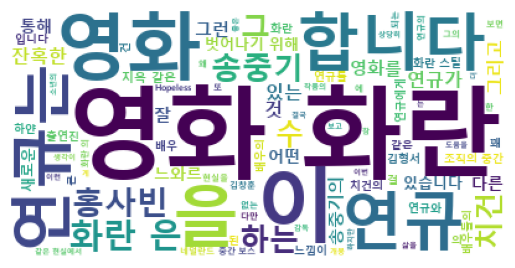

In [37]:
plt.imshow(wc)
plt.axis('off')